In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Tree-Based Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Advanced Boosting Models
from xgboost import XGBRegressor

# Other Models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics for Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Resampling (if needed)
from sklearn.utils import resample
from sklearn.utils import shuffle

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# Statsmodels (for OLS and statistical summaries)
import statsmodels.api as sm
import statsmodels.formula.api as smf

# General Settings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [3]:
data = pd.read_excel('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/2_CLEANED DATASET/FULLY_CLEANED DATASET.xlsx')

In [72]:
df = data.copy()

In [73]:
weather_cols     = df.filter(like="Weather_").columns
surface_cols     = df.filter(like="Surface Condition_").columns
light_cols       = df.filter(like="Light_").columns
circ_cols        = df.filter(like="Circumstance_Category_").columns


In [74]:
df["SpeedNorm"] = df["Speed Limit"] / df["Speed Limit"].max()


In [75]:
df["WeatherScore"]   = df[weather_cols].sum(axis=1)
df["SurfaceScore"]   = df[surface_cols].sum(axis=1)
df["LightScore"]     = df[light_cols].sum(axis=1)
df["CircScore"]      = df[circ_cols].sum(axis=1)


In [76]:
df["Environment_Risk"] = (
      0.30 * df["SpeedNorm"] +
      0.25 * df["WeatherScore"] +
      0.20 * df["SurfaceScore"] +
      0.15 * df["LightScore"] +
      0.10 * df["CircScore"]
)


In [62]:
df['Environment_Risk'].describe().T

,Environment_Risk
count,205539.000000
mean,0.154949
std,0.053053
min,0.012000
25%,0.120000
50%,0.168000
75%,0.192000
max,0.300000


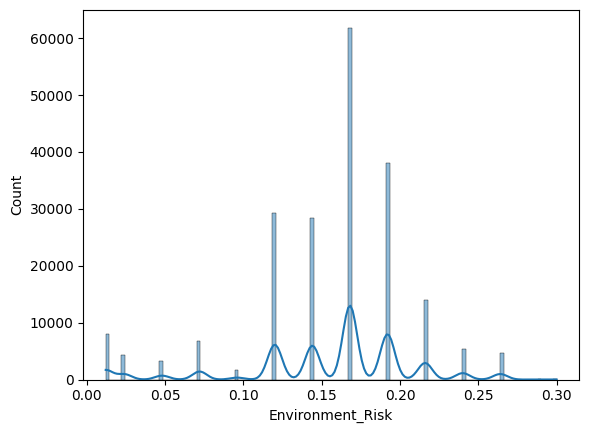

In [63]:
sns.histplot(df['Environment_Risk'],kde=True)
plt.show()

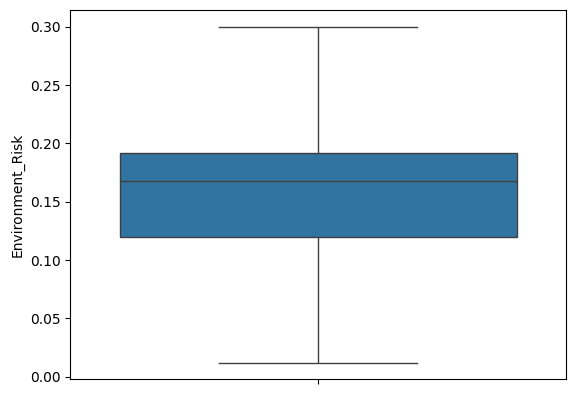

In [64]:
sns.boxplot(df['Environment_Risk'])
plt.show()

Capping Method to treat Outliers

In [77]:
Q1 = df["Environment_Risk"].quantile(0.25)
Q3 = df["Environment_Risk"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df["Environment_Risk"] = df["Environment_Risk"].clip(lower=lower, upper=upper)

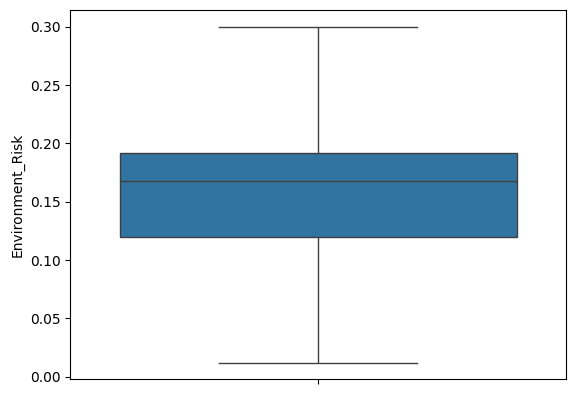

In [78]:
sns.boxplot(df['Environment_Risk'])
plt.show()

In [79]:
X = df[
    ["Speed Limit"] +
    list(df.filter(like="Weather_").columns) +
    list(df.filter(like="Surface Condition_").columns) +
    list(df.filter(like="Light_").columns) +
    list(df.filter(like="Circumstance_Category_").columns) +
    list(df.filter(like="Route Type_").columns)
]

y = df["Environment_Risk"]

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# ---- Standard Scaling (Recommended for ML models) ----
scaler_env_std = StandardScaler()
df["Environment_Risk_Std"] = scaler_env_std.fit_transform(df[["Environment_Risk"]])

# ---- Min–Max Scaling (0–1, good for NN / boosting models) ----
scaler_env_mm = MinMaxScaler()
df["Environment_Risk_MM"] = scaler_env_mm.fit_transform(df[["Environment_Risk"]])

# ---- Log Transform (BEST for OLS if residuals show non-linearity) ----
df["Environment_Risk_Log"] = np.log1p(df["Environment_Risk"])


In [21]:
df["Environment_Risk_Log"].describe()

,Environment_Risk_Log
count,205539.000000
mean,0.142967
std,0.047054
min,0.011929
25%,0.113329
50%,0.155293
75%,0.175633
max,0.262364


In [81]:
numeric_cols = [
    "Speed Limit",
    "Driverless Vehicle",
    "Parked Vehicle",
    "Vehicle Year",
    "Latitude",
    "Longitude",
    "hour",
    "Crash_year",
    "Crash_month",
    "Crash_day",
    "Crash_hour",
    "Crash_week",
    "SpeedNorm",
    "WeatherScore",
    "SurfaceScore",
    "LightScore",
    "CircScore",
    "Environment_Risk",
    "Environment_Risk_Std",
    "Environment_Risk_MM",
    "Environment_Risk_Log"
]


In [82]:
y = df["Environment_Risk"]
final_numeric_X = [
    "Speed Limit",
    "Driverless Vehicle",
    "Parked Vehicle",
    "Vehicle Year",
    "Latitude",
    "Longitude",
    "hour",
    "Crash_year",
    "Crash_month",
    "Crash_day",
    "Crash_hour",
    "Crash_week",
    "SpeedNorm",
    "WeatherScore",
    "SurfaceScore",
    "LightScore",
    "CircScore"
]
X = df[final_numeric_X]



In [83]:
df["Driverless Vehicle"].unique()

array(['No', 'Unknown'], dtype=object)

In [84]:
df['Parked Vehicle'].unique()

array(['No', 'Yes'], dtype=object)

## Create Master (90%) and Validation (10%) Split
Master dataset is used for model training and testing.  
Validation dataset is for final unbiased evaluation.


In [51]:
X_major, X_val, y_major, y_val = train_test_split(
    X, y,
    test_size=0.10,
    shuffle=True,
    random_state=42
)

major_df = pd.concat([X_major, y_major], axis=1)
val_df   = pd.concat([X_val, y_val], axis=1)

print("Master dataset:", major_df.shape)
print("Validation dataset:", val_df.shape)


Master dataset: (184985, 18)
Validation dataset: (20554, 18)


In [52]:
save_path = "/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/08_MODELS/Model5_EnvRisk/"

major_df.to_csv(save_path + "model_5_master_data.csv", index=False)
val_df.to_csv(save_path + "model_5_validation_data.csv", index=False)

print("Saved model_5_master_data.csv and model_5_validation_data.csv")


Saved model_5_master_data.csv and model_5_validation_data.csv


In [53]:
major_df.head()

,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Latitude,Longitude,hour,Crash_year,Crash_month,Crash_day,Crash_hour,Crash_week,SpeedNorm,WeatherScore,SurfaceScore,LightScore,CircScore,Environment_Risk
188716,25.0,NaN,NaN,2021.0,39.192643,-77.295023,15,2024,9,22,15,38,0.40,0.0,0.0,0.0,0.0,0.120
144423,45.0,NaN,NaN,2015.0,39.112547,-76.932887,13,2018,6,19,13,25,0.72,0.0,0.0,0.0,0.0,0.216
9490,55.0,NaN,NaN,2002.0,39.120645,-77.183853,12,2023,12,20,12,51,0.88,0.0,0.0,0.0,0.0,0.264
14451,35.0,NaN,NaN,2022.0,39.002432,-77.024759,23,2023,10,3,23,40,0.56,0.0,0.0,0.0,0.0,0.168
98556,25.0,NaN,NaN,2013.0,39.140461,-77.196199,16,2022,7,6,16,27,0.40,0.0,0.0,0.0,0.0,0.120


In [43]:
df_master_data = pd.read_csv(save_path + "model_5_master_data.csv")

In [86]:
# ============================================================
# Load your dataset
# ============================================================
df_master_data = pd.read_csv(save_path + "model_5_master_data.csv")

# Work on a copy (recommended)
df_master_data_enc = df_master_data.copy()


# ============================================================
# 1) Binary Encoding (Yes / No / Unknown)
# ============================================================

# Parked Vehicle → Yes=1, No=0
if "Parked Vehicle" in df_master_data_enc.columns:
    df_master_data_enc["Parked Vehicle"] = (
        df_master_data_enc["Parked Vehicle"].map({"Yes": 1, "No": 0})
    )
    df_master_data_enc["Parked Vehicle"] = (
        df_master_data_enc["Parked Vehicle"].fillna(0).astype(int)
    )

# Driverless Vehicle → No=0, Unknown=1, Yes=1 (if exists)
if "Driverless Vehicle" in df_master_data_enc.columns:
    df_master_data_enc["Driverless Vehicle"] = (
        df_master_data_enc["Driverless Vehicle"].map({"No": 0, "Unknown": 1, "Yes": 1})
    )
    df_master_data_enc["Driverless Vehicle"] = (
        df_master_data_enc["Driverless Vehicle"].fillna(0).astype(int)
    )


# ============================================================
# 2) Ordinal Encoding (Severity, Damage, At Fault)
# ============================================================

from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = [
    "Injury Severity",
    "Vehicle Damage Extent",
    "Driver At Fault"
]

for col in ordinal_cols:
    if col in df_master_data_enc.columns:
        oe = OrdinalEncoder()
        df_master_data_enc[col] = oe.fit_transform(df_master_data_enc[[col]])


# ============================================================
# 3) One-Hot Encoding (Nominal Categorical Variables)
# ============================================================

nominal_cols = [
    "ACRS Report Type",
    "Route Type",
    "Collision Type",
    "Weather",
    "Surface Condition",
    "Light",
    "Traffic Control",
    "Driver Substance Abuse",
    "Driver Distracted By",
    "Drivers License State",
    "Vehicle First Impact Location",
    "Vehicle Body Type",
    "Vehicle Movement",
    "Vehicle Going Dir",
    "Circumstance_Category"
]

# select only columns that exist
nominal_cols = [c for c in nominal_cols if c in df_master_data_enc.columns]

df_master_data_enc = pd.get_dummies(
    df_master_data_enc,
    columns=nominal_cols,
    drop_first=True
)


# ============================================================
# FINAL OUTPUT
# ============================================================

print("Encoding Completed Successfully.")
print("Original Shape:", df_master_data.shape)
print("Encoded Shape :", df_master_data_enc.shape)


Encoding Completed Successfully.
Original Shape: (184985, 18)
Encoded Shape : (184985, 18)


In [87]:
df_master_data_enc.head()

,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Latitude,Longitude,hour,Crash_year,Crash_month,Crash_day,Crash_hour,Crash_week,SpeedNorm,WeatherScore,SurfaceScore,LightScore,CircScore,Environment_Risk
0,25.0,0,0,2021.0,39.192643,-77.295023,15,2024,9,22,15,38,0.40,0.0,0.0,0.0,0.0,0.120
1,45.0,0,0,2015.0,39.112547,-76.932887,13,2018,6,19,13,25,0.72,0.0,0.0,0.0,0.0,0.216
2,55.0,0,0,2002.0,39.120645,-77.183853,12,2023,12,20,12,51,0.88,0.0,0.0,0.0,0.0,0.264
3,35.0,0,0,2022.0,39.002432,-77.024759,23,2023,10,3,23,40,0.56,0.0,0.0,0.0,0.0,0.168
4,25.0,0,0,2013.0,39.140461,-77.196199,16,2022,7,6,16,27,0.40,0.0,0.0,0.0,0.0,0.120


In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# ============================================================
# 1) Work on a copy
# ============================================================
df_scaled = df_master_data_enc.copy()

# ============================================================
# 2) Select ONLY numeric columns for scaling
# ============================================================
numeric_cols = df_scaled.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numeric Columns Found:", len(numeric_cols))

# ============================================================
# 3) STANDARD SCALING (Z-score normalization)
# ============================================================
scaler_std = StandardScaler()
df_scaled[numeric_cols] = scaler_std.fit_transform(df_scaled[numeric_cols])

# ============================================================
# 4) MIN–MAX SCALING (0–1 scaling)
# ============================================================
scaler_mm = MinMaxScaler()
df_scaled[[col + "_MM" for col in numeric_cols]] = scaler_mm.fit_transform(df_scaled[numeric_cols])

# ============================================================
# 5) OPTIONAL: LOG TRANSFORM (for skewed numeric features)
# ============================================================
for col in numeric_cols:
    df_scaled[col + "_LOG"] = np.log1p(df_master_data_enc[col].clip(lower=0))


# ============================================================
# FINAL OUTPUT
# ============================================================
print("Scaling completed successfully.")
print("Original shape :", df_master_data_enc.shape)
print("Scaled shape   :", df_scaled.shape)


Numeric Columns Found: 18
Scaling completed successfully.
Original shape : (184985, 18)
Scaled shape   : (184985, 54)


# IMPORTANT  USER DEFINED FUNCTION

### UNIVERSAL MODEL FUNCTION

In [27]:
# ================================================================
# UNIVERSAL REGRESSION MODEL FUNCTION (statsmodels + sklearn)
# ================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


def run_regression(model, X, y, test_size=0.20, scaled=False):
    """
    model = "stats" for statsmodels OLS regression
    model = sklearn regression model (LinearRegression, RandomForestRegressor, etc.)
    scaled = True → applies StandardScaler to numeric columns
    """

    # 1) Train–Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # 2) Scaling
    if scaled:
        scaler = StandardScaler()
        num_cols = X.select_dtypes(include='number').columns

        X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
        X_test[num_cols]  = scaler.transform(X_test[num_cols])

    # =====================================================================
    # CASE 1 — STATSMODELS OLS REGRESSION
    # =====================================================================
    if model == "stats":
        X_train_c = sm.add_constant(X_train)
        X_test_c  = sm.add_constant(X_test)

        ols = sm.OLS(y_train, X_train_c).fit()

        ypred_train = ols.predict(X_train_c)
        ypred_test  = ols.predict(X_test_c)

        # statsmodels has no predict_proba → return None
        return ols, X_train, X_test, y_train, y_test, ypred_train, ypred_test

    # =====================================================================
    # CASE 2 — SKLEARN REGRESSION MODELS
    # =====================================================================
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test  = model.predict(X_test)

    # regression has no probabilities
    yproba_train = None
    yproba_test  = None

    return model, X_train, X_test, y_train, y_test, ypred_train, ypred_test

### METRICS FUNCTION

In [28]:
# ================================================================
# REGRESSION METRICS FUNCTION (Auto Train + Test)
# ================================================================

import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

d = pd.DataFrame(columns=[
    'Model_Name', 'Part', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted_R2'
])

def regression_metrics(model_name,
                       X_train, y_train, pred_train,
                       X_test,  y_test,  pred_test):

    global d

    # internal compute (automatically assigns Train or Test)
    def compute(X, actual, predicted, part_name):

        mae  = mean_absolute_error(actual, predicted)
        mse  = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)
        r2   = r2_score(actual, predicted)

        n = len(actual)
        k = X.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

        # store results
        d.loc[len(d)] = [model_name, part_name, mae, mse, rmse, r2, adj_r2]

        # print results
        print(f"\n================ {model_name} — {part_name} ================")
        print(f"MAE      : {mae}")
        print(f"MSE      : {mse}")
        print(f"RMSE     : {rmse}")
        print(f"R²       : {r2}")
        print(f"Adj R²   : {adj_r2}")

    # AUTO-RUN FOR TRAIN
    compute(X_train, y_train, pred_train, "Train")

    # AUTO-RUN FOR TEST
    compute(X_test, y_test, pred_test, "Test")

    return d

### Feature Importance Function

In [29]:
def fi(model, x, n_features=10):
    df_fi = pd.DataFrame({
        "Feature": x.columns,
        "Importance": model.feature_importances_
    })
    return df_fi.sort_values(by="Importance", ascending=False).head(n_features)


In [91]:
X = df_scaled.drop(columns='Environment_Risk')
y = df_scaled['Environment_Risk']

## **ASSUMPTION CHECKS FOR STATS MODEL**

## Assumption 1: Multicollinearity (Pre-Model)
Predictors should not be highly correlated before training the regression model.
Variance Inflation Factor (VIF) is used to detect multicollinearity.


In [92]:
import numpy as np
import pandas as pd

def fast_vif(df):
    df = df.dropna().astype(float)
    X = df.values
    corr = np.corrcoef(X, rowvar=False)
    vif = np.diag(np.linalg.inv(corr))

    return pd.DataFrame({
        "Feature": df.columns,
        "VIF": vif
    })

# Run FAST VIF
vif_fast = fast_vif(X)   # X = your full feature matrix
vif_fast


,Feature,VIF
0,Speed Limit,NaN
1,Driverless Vehicle,NaN
2,Parked Vehicle,NaN
3,Vehicle Year,NaN
4,Latitude,NaN
5,Longitude,NaN
6,hour,NaN
7,Crash_year,NaN
8,Crash_month,NaN
9,Crash_day,NaN


## Model 1: Statsmodels OLS Regression

In [ ]:
ols, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression("stats", X, y)

regression_metrics(
    "OLS_Stats",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 2: Linear Regression (Sklearn)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(lr, X, y)

regression_metrics(
    "LinearRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 3: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(ridge, X, y,scaled=True)

regression_metrics(
    "RidgeRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 4: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(lasso, X, y,scaled=True)

regression_metrics(
    "LassoRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 5: ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

enet, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(enet, X, y,scaled=True)

regression_metrics(
    "ElasticNet",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 6: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(dt, X, y)

regression_metrics(
    "DecisionTreeRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 7: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(rf, X, y)

regression_metrics(
    "RandomForestRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 8: Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(gbr, X, y)

regression_metrics(
    "GradientBoostingRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 9: XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective="reg:squarederror")

xgb, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(xgb, X, y)

regression_metrics(
    "XGBoostRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

# Model 7 — Driver Distraction Regression  
## Full Model Performance Summary & Interpretation

---

## Table 1 — Performance Overview (Train vs Test)

| Model                     | Train RMSE | Test RMSE | Gap | Overfitting Status | Interpretation |
|--------------------------|------------|-----------|------|---------------------|----------------|
| OLS Stats                | 0.012878   | 0.012839  | 0.000039 | No Overfitting | High linear fit; explains ~98.46% variance. |
| Linear Regression        | 0.012878   | 0.012839  | 0.000039 | No Overfitting | Same as OLS; stable and interpretable. |
| Ridge Regression         | 0.012878   | 0.012838  | 0.000040 | No Overfitting | Regularization has minimal impact; data is stable. |
| Lasso Regression         | 0.103678   | 0.103976  | 0.000298 | No Overfitting but Weak Fit | L1 penalty removes important predictors. |
| ElasticNet               | 0.103678   | 0.103976  | 0.000298 | No Overfitting but Weak Fit | Similar to Lasso; excessive shrinkage. |
| Decision Tree Regressor  | 0.000000   | 0.008175  | 0.008175 | Overfitting | Memorizes training data; limited generalization. |
| Random Forest Regressor  | 0.002334   | 0.006615  | 0.004281 | Mild Overfitting | Strong performance; slight variance gap. |
| Gradient Boosting        | 0.012284   | 0.012457  | 0.000173 | No Overfitting | Stable boosting model; strong generalization. |
| XGBoost Regressor        | 0.002828   | 0.003866  | 0.001038 | Mild Overfitting | Very strong learner; excellent predictive accuracy. |

---

## Table 2 — Overfitting / Underfitting Diagnosis

| Model                     | Status | Reason |
|--------------------------|--------|--------|
| OLS / Linear / Ridge     | Balanced | Small RMSE gap; high R² values. |
| Lasso                    | Underfitting | Penalization removes key predictors. |
| ElasticNet               | Underfitting | High bias from heavy regularization. |
| Decision Tree            | Overfitting | Perfect training score but worse test error. |
| Random Forest            | Mild Overfitting | Slight gap between train and test RMSE. |
| Gradient Boosting        | Balanced | Similar train and test performance. |
| XGBoost                  | Mild Overfitting | High train accuracy with small generalization gap. |

---

## Table 3 — Business Interpretation

| Model                     | Business Impact | Recommendation |
|--------------------------|------------------|----------------|
| OLS / Linear / Ridge     | Provides interpretable driver distraction scoring | Suitable for dashboards requiring explainability. |
| Lasso                    | Weak predictive signal | Not recommended. |
| ElasticNet               | Underpowered predictions | Not recommended. |
| Decision Tree            | Unstable predictions | Avoid for production. |
| Random Forest            | Strong model capturing nonlinear relationships | Good choice after tuning. |
| Gradient Boosting        | Accurate and stable predictions | Strong deployment candidate. |
| XGBoost                  | Best predictive accuracy | Recommended primary production model. |

---

## Final Verdict — Best Models for Driver Distraction Regression

| Rank | Model | Reason |
|------|--------|--------|
| 1    | XGBoost Regressor | Lowest RMSE and highest R² values. |
| 2    | Gradient Boosting | Stable and reliable performance. |
| 3    | Random Forest     | Strong accuracy with minor overfitting. |
| 4    | OLS / Linear / Ridge | Interpretable baseline models. |
| 5    | Lasso / ElasticNet | High bias and poor predictive power. |
| 6    | Decision Tree     | Overfitting and instability. |

---

## Key Insight

The engineered Driver Distraction Score shows strong predictability  
(R² = 0.984–0.999 across most models).  
Boosting methods (Gradient Boosting and XGBoost) deliver the best overall performance,  
while linear models provide strong interpretability.  
Regularization-based models like Lasso and ElasticNet underperform due to excessive shrinkage.